In [1]:
import warnings
warnings.filterwarnings('ignore')
# Basice libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Plotting libraries
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


# Preparing Data for EDA

In [2]:
# Displaying training data
pd.set_option('max_colwidth', 200)
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Calculating missing value statistics
missing_number = df.isnull().sum().sort_values(ascending = False)
missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys =['Missing_Number','Missing_Percent'])
missing_values

,Missing_Number,Missing_Percent
Gender,0,0.0
SMOKE,0,0.0
MTRANS,0,0.0
CALC,0,0.0
TUE,0,0.0
FAF,0,0.0
SCC,0,0.0
CH2O,0,0.0
CAEC,0,0.0
Age,0,0.0


In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
# Selecting columns that have numerical and categorical values
num_features = df.select_dtypes('number').columns
cat_features = df.drop(['NObeyesdad'], axis=1).select_dtypes('object').columns
# Printing the results
print(f'Numerical Columns: {list(df[num_features].columns)}\n')
print(f'Categorical Columns: {list(df[cat_features].columns)}')

Numerical Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Categorical Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [6]:
# Number of unique values
df[cat_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
dtype: int64

# Data Visualization


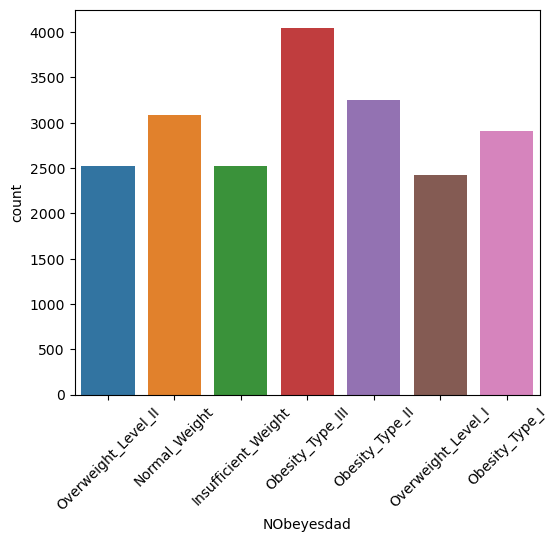

In [16]:
y = df['NObeyesdad']
plt.figure(figsize= (6,5), dpi = 100)
plt.xticks(rotation = 45)
sns.countplot(df, x = 'NObeyesdad')
plt.show()

# Numerical Features Analysis

In [17]:
df[num_features].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


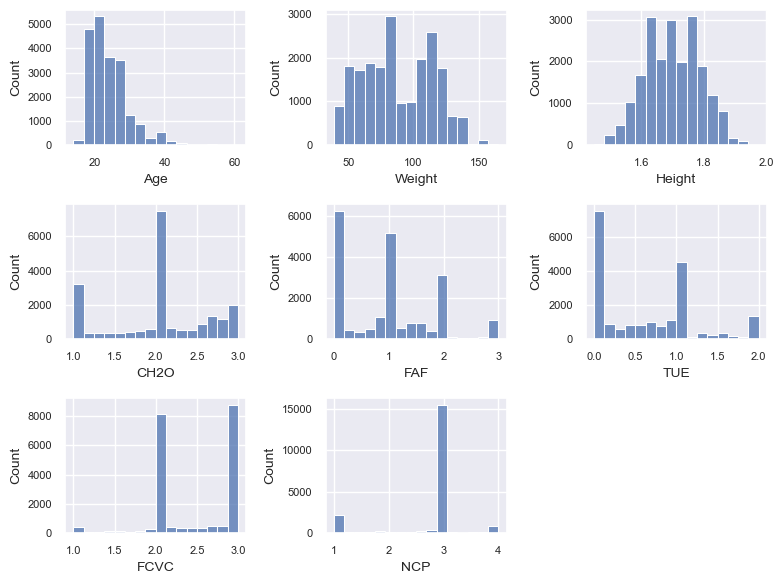

In [22]:
sns.set(style = 'darkgrid')
fig, ax = plt.subplots(3,3, figsize = (8,6), dpi = 100)
for a in range(3):
    for b in range(3):
        ax[a,b].tick_params(axis='both', labelsize=8)
        ax[a,b].xaxis.label.set_size(10)
        ax[a,b].yaxis.label.set_size(10)

# Histplots for each feature
sns.histplot(df, x="Age", bins=16, ax=ax[0, 0])
sns.histplot(df, x="Weight",  bins=16, ax=ax[0, 1])
sns.histplot(df, x="Height",  bins=16, ax=ax[0, 2])
sns.histplot(df, x="CH2O", bins=16, ax=ax[1, 0])
sns.histplot(df, x="FAF",  bins=16, ax=ax[1, 1])
sns.histplot(df, x="TUE",  bins=16, ax=ax[1, 2])
sns.histplot(df, x="FCVC",  bins=16, ax=ax[2, 0])
sns.histplot(df, x="NCP",  bins=16, ax=ax[2, 1])
ax[2,2].set_axis_off()
plt.tight_layout()

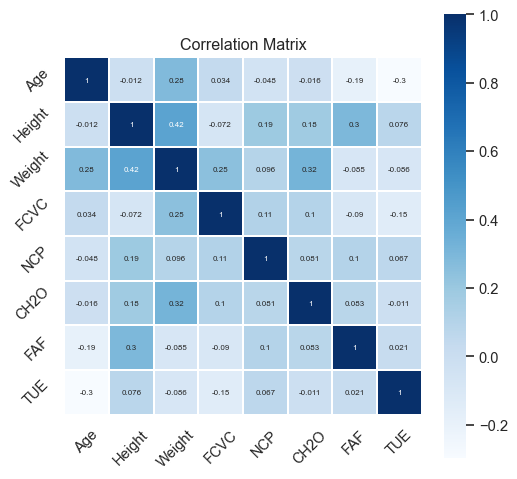

In [31]:
# Correlation matrix for numerical features
plt.figure(figsize=(6, 6),dpi=96)
sns.heatmap(df[num_features].corr(), annot=True, cmap='Blues', linewidths=0.1, square=True, annot_kws={"fontsize":6})
plt.title('Correlation Matrix')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

# Categorical Features

In [32]:
df[cat_features].head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
id,,,,,,,,
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Frequently,no,no,no,Automobile
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


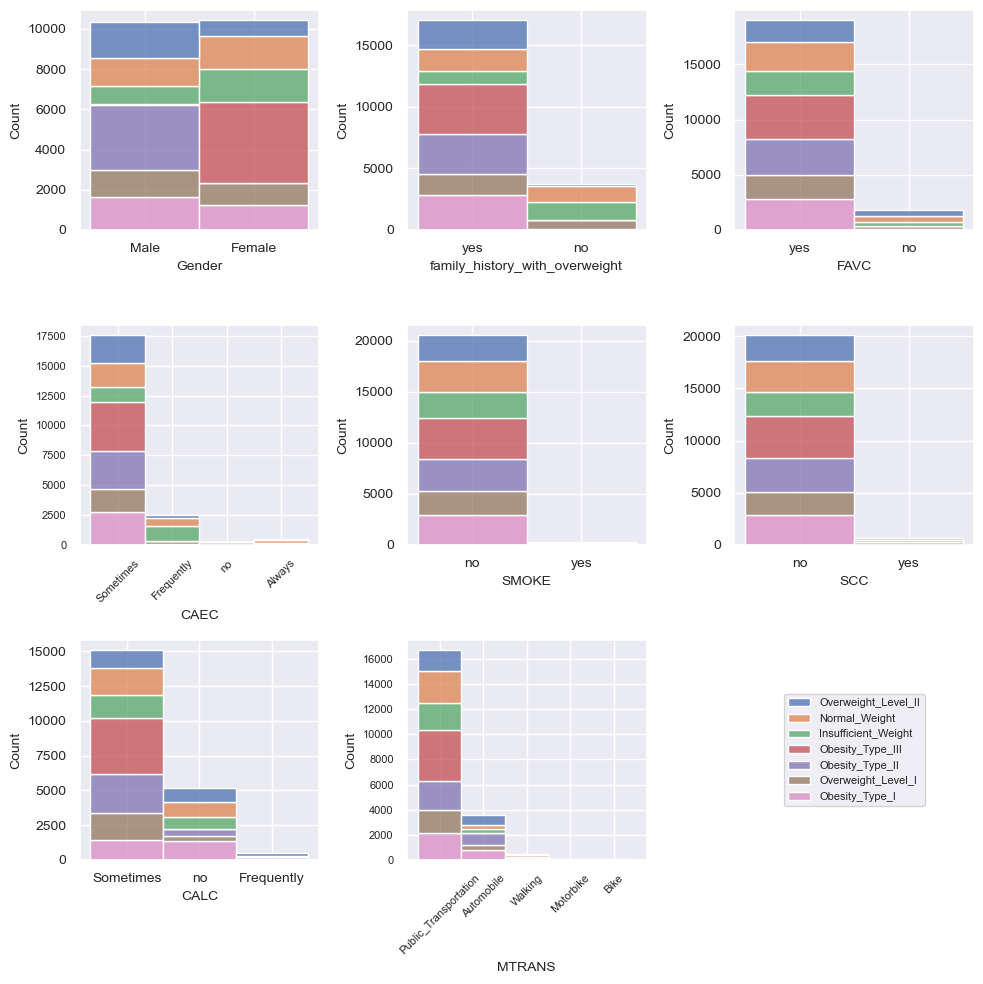

In [38]:
# Subplot initialization
sns.set(style="darkgrid")
fig, ax = plt.subplots(3, 3, figsize=(10, 10), dpi=100)
for a in range(3):
    for b in range(3):
        ax[a,b].tick_params(axis='both', labelsize=10)
        ax[a,b].xaxis.label.set_size(10)
        ax[a,b].yaxis.label.set_size(10)
ax[1,0].tick_params(axis='x', rotation=45)
ax[1,0].tick_params(axis='both', labelsize=8)
ax[2,1].tick_params(axis='x', rotation=45)
ax[2,1].tick_params(axis='both', labelsize=8)
# Histplots for each feature
sns.histplot(df, x="Gender", hue="NObeyesdad", multiple='stack', legend=False, ax=ax[0, 0])
sns.histplot(df, x="family_history_with_overweight", hue="NObeyesdad", multiple='stack', legend=False, ax=ax[0, 1])
sns.histplot(df, x="FAVC", hue="NObeyesdad", multiple='stack', legend=False, ax=ax[0, 2])
sns.histplot(df, x="CAEC", hue="NObeyesdad", multiple='stack', legend=False, ax=ax[1, 0])
sns.histplot(df, x="SMOKE", hue="NObeyesdad", multiple='stack', legend=False, ax=ax[1, 1])
sns.histplot(df, x="SCC", hue="NObeyesdad", multiple='stack', legend=False, ax=ax[1, 2])
sns.histplot(df, x="CALC", hue="NObeyesdad", multiple='stack', legend=False, ax=ax[2, 0])
sns.histplot(df, x="MTRANS", hue="NObeyesdad", multiple='stack', legend=False, ax=ax[2, 1])
# Plotting the legend only
sns.histplot(df, x="FAVC", hue="NObeyesdad", multiple='stack', ax=ax[2, 2])
legend = ax[2, 2].get_legend()
ax[2, 2].clear()
ax[2, 2].legend(legend.legendHandles, [str(x._text) for x in legend.texts], loc='center', prop={'size':8})
ax[2, 2].axis('off')
plt.tight_layout()